In [39]:
using CSV, Plots, LaTeXStrings
cur_colors = get_color_palette(:auto, plot_color(:white));

In [22]:
csv_reader = CSV.File("./new/1d_SSHH_U4.0_L12_nup6_ndn6_PBC.csv", header=0)
l = length(csv_reader)
dt_list = -0.5:0.05:0.5

S2_U4_PBC = zeros(Float64, l)
S2m_U4_PBC = zeros(Float64, l)
S2n_U4_PBC = zeros(Float64, l)

Pm_U4_PBC = zeros(Float64, 13, l)
Pn_U4_PBC = zeros(Float64, 13, l)
P2m_U4_PBC = zeros(Float64, 13, l)
P2n_U4_PBC = zeros(Float64, 13, l)

for i in 1:length(csv_reader)
    S2_U4_PBC[i] = csv_reader[i][1]
    S2m_U4_PBC[i] = csv_reader[i][2]
    S2n_U4_PBC[i] = csv_reader[i][3]

    P2m_U4_PBC[:, i] = parse.(Float64, split(csv_reader[i][5], r"\[|\s|\n|\]", keepempty=false))
    P2n_U4_PBC[:, i] = parse.(Float64, split(csv_reader[i][6], r"\[|\s|\n|\]", keepempty=false))

    Pm_U4_PBC[:, i] = parse.(Float64, split(csv_reader[i][8], r"\[|\s|\n|\]", keepempty=false))
    Pn_U4_PBC[:, i] = parse.(Float64, split(csv_reader[i][9], r"\[|\s|\n|\]", keepempty=false))
end

In [50]:
csv_reader = CSV.File("./1d_SSHH_U4.0_L12_nup6_ndn6_OBC.csv", header=0)
S2_U4_OBC_0 = csv_reader[11][1]
S2m_U4_OBC_0 = csv_reader[11][2]
S2n_U4_OBC_0 = csv_reader[11][3];

In [23]:
csv_reader = CSV.File("./new/1d_SSHH_U4.0_L12_nup6_ndn6_OBC.csv", header=0)
l = length(csv_reader)
dt_list = -0.5:0.05:0.5

S2_U4_OBC = zeros(Float64, l)
S2m_U4_OBC = zeros(Float64, l)
S2n_U4_OBC = zeros(Float64, l)

Pm_U4_OBC = zeros(Float64, 15, l)
Pn_U4_OBC = zeros(Float64, 15, l)
P2m_U4_OBC = zeros(Float64, 15, l)
P2n_U4_OBC = zeros(Float64, 15, l)

for i in 1:length(csv_reader)
    S2_U4_OBC[i] = csv_reader[i][1]
    S2m_U4_OBC[i] = csv_reader[i][2]
    S2n_U4_OBC[i] = csv_reader[i][3]

    @views copyto!(P2m_U4_OBC[:, i], parse.(Float64, split(csv_reader[i][5], r"\[|\s|\n|\]", keepempty=false)))
    @views copyto!(P2n_U4_OBC[:, i], parse.(Float64, split(csv_reader[i][6], r"\[|\s|\n|\]", keepempty=false)))

    @views copyto!(Pm_U4_OBC[:, i], parse.(Float64, split(csv_reader[i][8], r"\[|\s|\n|\]", keepempty=false)))
    @views copyto!(Pn_U4_OBC[:, i], parse.(Float64, split(csv_reader[i][9], r"\[|\s|\n|\]", keepempty=false)))
end

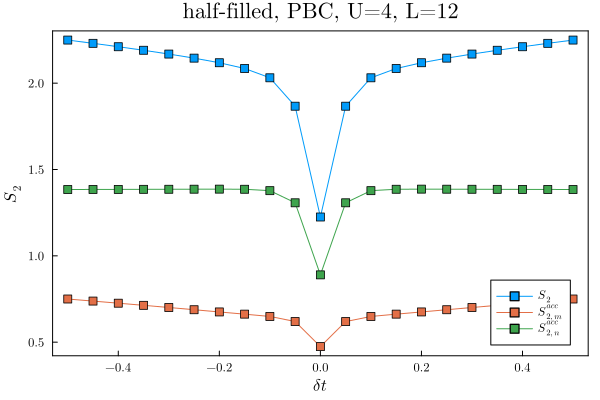

In [24]:
plot(
    dt_list, S2_U4_PBC,
    label = L"S_2",
    marker=(4, :square),
    xlabel=L"\delta t", ylabel=L"S_2",
    title="half-filled, PBC, U=4, L=12",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot!(
    -0.5:0.05:0.5, S2m_U4_PBC,
    label = L"S_{2,m}^{\rm acc}",
    marker=(4, :square)
)

plot!(
    -0.5:0.05:0.5, S2n_U4_PBC,
    label = L"S_{2,n}^{\rm acc}",
    marker=(4, :square)
)

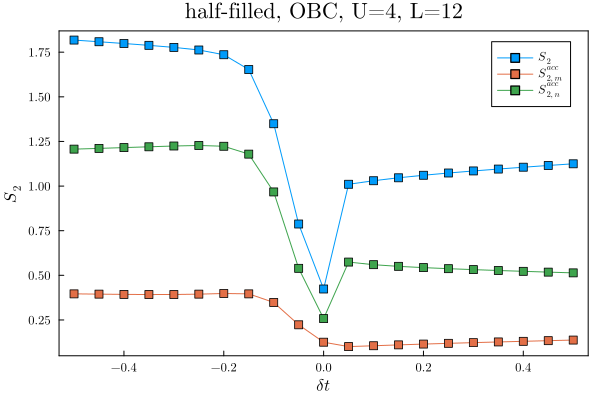

In [25]:
plot(
    dt_list, S2_U4_OBC,
    label = L"S_2",
    marker=(4, :square),
    xlabel=L"\delta t", ylabel=L"S_2",
    title="half-filled, OBC, U=4, L=12",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot!(
    -0.5:0.05:0.5, S2m_U4_OBC,
    label = L"S_{2,m}^{\rm acc}",
    marker=(4, :square)
)

plot!(
    -0.5:0.05:0.5, S2n_U4_OBC,
    label = L"S_{2,n}^{\rm acc}",
    marker=(4, :square)
)

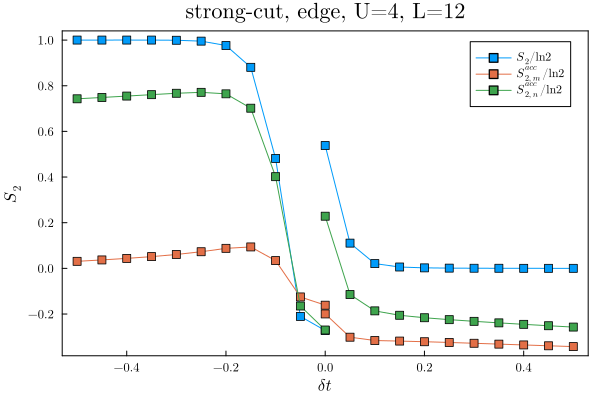

In [53]:
plot(
    dt_list[1:11], (S2_U4_OBC[1:11] - S2_U4_PBC[1:11]/2) / log(2),
    label = L"S_2 / \ln2",
    marker=(4, :square),
    mc=cur_colors[1], lc=cur_colors[1],
    xlabel=L"\delta t", ylabel=L"S_2",
    title="strong-cut, edge, U=4, L=12",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

s = vcat(S2_U4_OBC_0 - S2_U4_PBC[11]/2, S2_U4_OBC[12:end] - S2_U4_PBC[12:end]/2)

plot!(
    dt_list[11:end], s / log(2),
    label = false,
    marker=(4, :square),
    mc=cur_colors[1], lc=cur_colors[1]
)

plot!(
    dt_list[1:11], (S2m_U4_OBC[1:11] - S2m_U4_PBC[1:11]/2) / log(2),
    mc=cur_colors[2], lc=cur_colors[2],
    label = L"S_{2,m}^{\rm acc} / \ln2",
    marker=(4, :square)
)

s = vcat(S2m_U4_OBC_0 - S2m_U4_PBC[11]/2, S2m_U4_OBC[12:end] - S2m_U4_PBC[12:end]/2)

plot!(
    dt_list[11:end], s / log(2),
    label = false,
    marker=(4, :square),
    mc=cur_colors[2], lc=cur_colors[2]
)

plot!(
    dt_list[1:11], (S2n_U4_OBC[1:11] - S2n_U4_PBC[1:11]/2) / log(2),
    mc=cur_colors[3], lc=cur_colors[3],
    label = L"S_{2,n}^{\rm acc} / \ln2",
    marker=(4, :square)
)

s = vcat(S2n_U4_OBC_0 - S2n_U4_PBC[11]/2, S2n_U4_OBC[12:end] - S2n_U4_PBC[12:end]/2)

plot!(
    dt_list[11:end], s / log(2),
    label = false,
    marker=(4, :square),
    mc=cur_colors[3], lc=cur_colors[3]
)

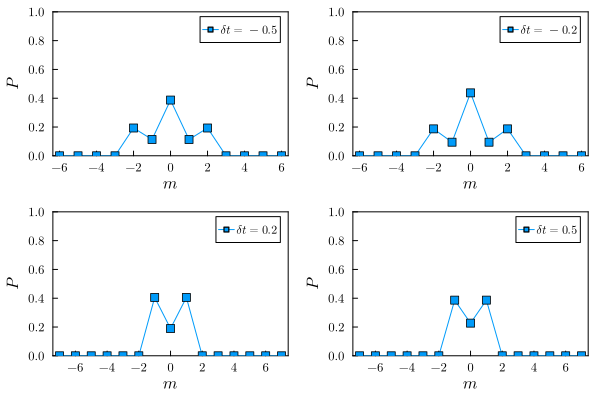

In [27]:
p1 = plot(
    -6:6, Pm_U4_OBC[1:13, 1],
    label = L"\delta t = -0.5",
    marker=(4, :square),
    xlabel=L"m", ylabel=L"P",
    ylim=(0,1), xticks = -6:2:6,
    #title="spin distribution, U=4, L=12",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

p2 = plot(
    -6:6, Pm_U4_OBC[1:13, 7],
    label = L"\delta t = -0.2",
    marker=(4, :square),
    xlabel=L"m", ylabel=L"P",
    ylim=(0,1), xticks = -6:2:6,
    #title="spin distribution, U=4, L=12",
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

p3 = plot(
    -7:7, Pm_U4_OBC[:, 15],
    label = L"\delta t = 0.2",
    marker=(4, :square),
    xlabel=L"m", ylabel=L"P",
    ylim=(0,1), xticks = -6:2:6,
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

p4 = plot(
    -7:7, Pm_U4_OBC[:, 21],
    label = L"\delta t = 0.5",
    marker=(4, :square),
    xlabel=L"m", ylabel=L"P",
    ylim=(0,1), xticks = -6:2:6,
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot(p1, p2, p3, p4, layout=(2,2))

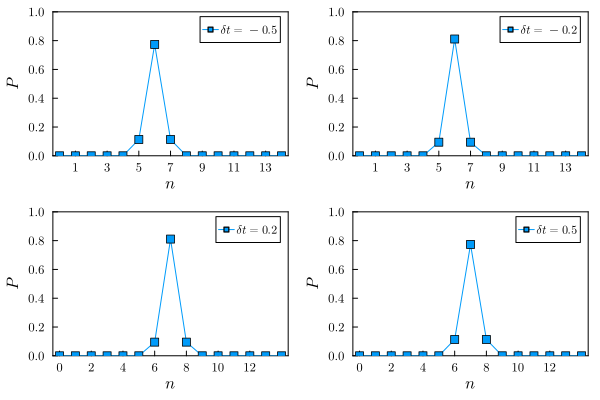

In [28]:
p1 = plot(
    0:14, Pn_U4_OBC[:, 1],
    label = L"\delta t = -0.5",
    marker=(4, :square),
    xlabel=L"n", ylabel=L"P",
    ylim=(0,1), xticks = 1:2:13,
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

p2 = plot(
    0:14,Pn_U4_OBC[:, 7],
    label = L"\delta t = -0.2",
    marker=(4, :square),
    xlabel=L"n", ylabel=L"P",
    ylim=(0,1), xticks = 1:2:13,
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

p3 = plot(
    0:14,Pn_U4_OBC[:, 15],
    label = L"\delta t = 0.2",
    marker=(4, :square),
    xlabel=L"n", ylabel=L"P",
    ylim=(0,1), xticks= 0:2:12,
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

p4 = plot(
    0:14,Pn_U4_OBC[:, 21],
    label = L"\delta t = 0.5",
    marker=(4, :square),
    xlabel=L"n", ylabel=L"P",
    ylim=(0,1), xticks= 0:2:12,
    framestyle=:box, grid=:false,
    fontfamily="Computer Modern"
)

plot(p1, p2, p3, p4, layout=(2,2))